### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns
import pandas_profiling

%matplotlib inline

### Import the data

In [2]:
bicimad = pd.read_csv("bicimad.csv")

### What's in there?

In [3]:
bicimad.head()  # prints first 5 rows

,date,year_subs_trips,temp_subs_trips
0,2014-06-23,17,79
1,2014-06-24,24,48
2,2014-06-25,105,14
3,2014-06-26,120,15
4,2014-06-27,131,18


In [4]:
bicimad.tail()  # prints last 5 rows

,date,year_subs_trips,temp_subs_trips
2013,2019-12-27,6387,0
2014,2019-12-28,5058,0
2015,2019-12-29,4616,0
2016,2019-12-30,5772,0
2017,2019-12-31,5270,0


In [5]:
bicimad.sample(n=5)  # prints random sample of n rows

,date,year_subs_trips,temp_subs_trips
1583,2018-10-23,14081,136
1858,2019-07-25,13265,114
1586,2018-10-26,11387,126
980,2017-02-27,7052,174
849,2016-10-19,4292,17


In [6]:
bicimad.dtypes  # prints the type of data contained in each column

date               object
year_subs_trips     int64
temp_subs_trips     int64
dtype: object

In [7]:
bicimad.columns  # names of the columns

Index(['date', 'year_subs_trips', 'temp_subs_trips'], dtype='object')

In [8]:
bicimad.describe()

,year_subs_trips,temp_subs_trips
count,2018.000000,2018.000000
mean,8483.408325,162.712587
std,3377.176507,131.755530
min,17.000000,0.000000
25%,5874.000000,63.000000
50%,8511.500000,138.000000
75%,11027.500000,222.750000
max,17054.000000,745.000000


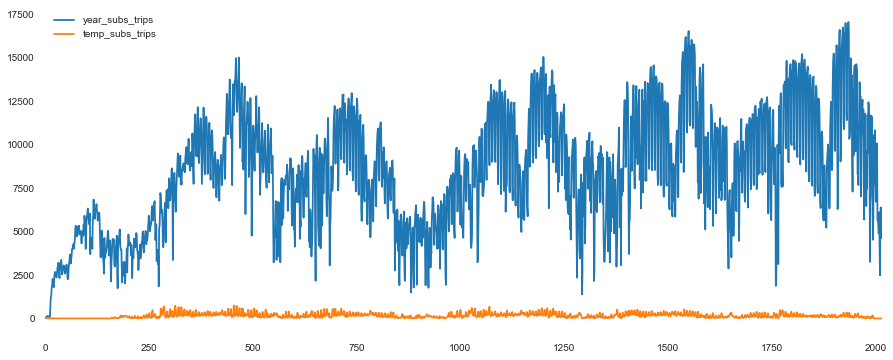

In [9]:
bicimad.plot(figsize=(15, 6))  # uses matplotlib.pyplot to plot 

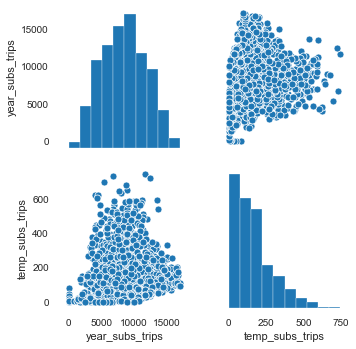

In [10]:
sns.pairplot(bicimad.iloc[:, 1:])  # useful plot from seaborn to get an idea of how the data looks like

### Process data a bit

In [11]:
bicimad["date"] = pd.to_datetime(bicimad["date"])  # convert date from string to date

In [12]:
bicimad.dtypes

date               datetime64[ns]
year_subs_trips             int64
temp_subs_trips             int64
dtype: object

In [13]:
bicimad["year"] = bicimad["date"].dt.year

In [14]:
# create some time related variables

bicimad["year"] = bicimad["date"].map(lambda x: x.year)
bicimad["month"] = bicimad["date"].map(lambda x: x.month)
bicimad["day"] = bicimad["date"].map(lambda x: x.day)
bicimad["weekday"] = bicimad["date"].map(lambda x: x.weekday())
bicimad["weekend"] = np.where(bicimad["weekday"] < 5, 0, 1)

In [24]:
bicimad["weekend_lambda"] = bicimad["weekday"].map(lambda x: 1*(x>4))

In [25]:
bicimad.head()

,date,year_subs_trips,temp_subs_trips,year,month,day,weekday,weekend,season,weekend_lambda
0,2014-06-23,17,79,2014,6,23,0,0,summer,0
1,2014-06-24,24,48,2014,6,24,1,0,summer,0
2,2014-06-25,105,14,2014,6,25,2,0,summer,0
3,2014-06-26,120,15,2014,6,26,3,0,summer,0
4,2014-06-27,131,18,2014,6,27,4,0,summer,0


In [26]:
bicimad.head()

,date,year_subs_trips,temp_subs_trips,year,month,day,weekday,weekend,season,weekend_lambda
0,2014-06-23,17,79,2014,6,23,0,0,summer,0
1,2014-06-24,24,48,2014,6,24,1,0,summer,0
2,2014-06-25,105,14,2014,6,25,2,0,summer,0
3,2014-06-26,120,15,2014,6,26,3,0,summer,0
4,2014-06-27,131,18,2014,6,27,4,0,summer,0


### Slicing

In [27]:
# trips during weekends

bicimad.query("weekend == True")

,date,year_subs_trips,temp_subs_trips,year,month,day,weekday,weekend,season,weekend_lambda
5,2014-06-28,101,18,2014,6,28,5,1,summer,1
6,2014-06-29,107,33,2014,6,29,6,1,summer,1
12,2014-07-05,783,3,2014,7,5,5,1,summer,1
13,2014-07-06,1230,5,2014,7,6,6,1,summer,1
19,2014-07-12,1949,4,2014,7,12,5,1,summer,1
...,...,...,...,...,...,...,...,...,...,...
2001,2019-12-15,6714,1,2019,12,15,6,1,fall,1
2007,2019-12-21,5353,0,2019,12,21,5,1,winter,1
2008,2019-12-22,4891,0,2019,12,22,6,1,winter,1
2014,2019-12-28,5058,0,2019,12,28,5,1,winter,1


In [28]:
# trips on Mondays during July 2017
bicimad[
    (bicimad["year"] == 2017) &
    (bicimad["month"] == 7) &
    (bicimad["weekday"] == 0)
]

,date,year_subs_trips,temp_subs_trips,year,month,day,weekday,weekend,season,weekend_lambda
1106,2017-07-03,11905,256,2017,7,3,0,0,summer,0
1113,2017-07-10,11684,289,2017,7,10,0,0,summer,0
1120,2017-07-17,11127,193,2017,7,17,0,0,summer,0
1127,2017-07-24,10956,136,2017,7,24,0,0,summer,0
1134,2017-07-31,9759,258,2017,7,31,0,0,summer,0


In [37]:
# only year_subs_trips, date, weekend
# post example

bicimad.filter(["year_subs_trips", "date", "weekend"])

# bicimad.head()

,year_subs_trips,date,weekend
0,17,2014-06-23,0
1,24,2014-06-24,0
2,105,2014-06-25,0
3,120,2014-06-26,0
4,131,2014-06-27,0
...,...,...,...
2013,6387,2019-12-27,0
2014,5058,2019-12-28,1
2015,4616,2019-12-29,1
2016,5772,2019-12-30,0


### Filter the data

Filter:
* between 2015 and 2018
* Monday to Thursday
* summer

In [20]:
# we need a function to extract season from date
def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
bicimad["season"] = bicimad["date"].map(get_season)

In [21]:
bicimad.sample(4)  # boom

,date,year_subs_trips,temp_subs_trips,year,month,day,weekday,weekend,season
1039,2017-04-27,8761,61,2017,4,27,3,0,spring
1460,2018-06-22,13590,227,2018,6,22,4,0,summer
1967,2019-11-11,11699,68,2019,11,11,0,0,fall
1821,2019-06-18,14703,140,2019,6,18,1,0,spring


In [40]:
list(year_filter)

[2015, 2016, 2017, 2018]

In [38]:
# now we can work on our filters

year_filter = range(2015, 2019)  # [2015, 2016, 2017, 2018]
weekday_filter = range(4)
season_filter = "summer"

# filter time
bicimad[
    (bicimad["year"].isin(year_filter)) &
    (bicimad["weekday"].isin(weekday_filter)) &
    (bicimad["season"]=="summer") 
]

,date,year_subs_trips,temp_subs_trips,year,month,day,weekday,weekend,season,weekend_lambda
364,2015-06-22,9903,183,2015,6,22,0,0,summer,0
365,2015-06-23,9334,148,2015,6,23,1,0,summer,0
366,2015-06-24,11459,179,2015,6,24,2,0,summer,0
367,2015-06-25,12147,182,2015,6,25,3,0,summer,0
371,2015-06-29,9721,141,2015,6,29,0,0,summer,0
...,...,...,...,...,...,...,...,...,...,...
1543,2018-09-13,16189,196,2018,9,13,3,0,summer,0
1547,2018-09-17,14316,208,2018,9,17,0,0,summer,0
1548,2018-09-18,15149,120,2018,9,18,1,0,summer,0
1549,2018-09-19,16313,140,2018,9,19,2,0,summer,0


### Plots

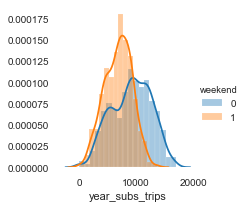

In [23]:
# using seaborn

g = sns.FacetGrid(bicimad, hue="weekend")
g = g.map(sns.distplot, "year_subs_trips")
g.add_legend()